# Topic modeling on Movie_Plot Dataset

Trying out the content based recommendation with respect to Plot summary for each movie. The basic idea is, as we have user profiles represnting their interest in genre, trying to recommend user the movies he would be interested in by applying topic modeling on the plot summary.

In [1]:
#Importing pandas library
import pandas as pd

In [2]:
#Loading dataset
df = pd.read_csv(r"C:\Users\sprad\Desktop\movie_plot.csv")

Data Exploration

In [3]:
df.head()

,movie_id,movie title,date,movie runtime,Language,genre,plot
0,9363483,White Of The Eye,1987,110.0,English,"Thriller, Erotic thriller, Psychological thriller",A series of murders of rich young women throug...
1,261236,A Woman in Flames,1983,106.0,German,Drama,"Eva, an upper class housewife, becomes frustra..."
2,18998739,The Sorcerer's Apprentice,2002,86.0,English,"Family Film, Fantasy, Adventure, World cinema","Every hundred years, the evil Morgana returns..."
3,6631279,Little city,4/4/1997,93.0,English,"Romantic comedy, Ensemble Film, Comedy-drama, ...","Adam, a San Francisco-based artist who works a..."
4,171005,Henry V,11/8/1989,137.0,English,"Costume drama, War film, Epic, Period piece, D...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...


In [4]:
df.shape

(42203, 7)

In [5]:
df.isnull().sum()

movie_id            0
movie title         0
date             2618
movie runtime    6624
Language         5264
genre             411
plot                0
dtype: int64

In [6]:
#Downloading the stopwords that can be removed from text and building corpus using nltk library
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [7]:
#importing libraries for visualization of words based on how frequent they are
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [8]:
#importing matplot for visualization
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [9]:
df.head()

,movie_id,movie title,date,movie runtime,Language,genre,plot
0,9363483,White Of The Eye,1987,110.0,English,"Thriller, Erotic thriller, Psychological thriller",A series of murders of rich young women throug...
1,261236,A Woman in Flames,1983,106.0,German,Drama,"Eva, an upper class housewife, becomes frustra..."
2,18998739,The Sorcerer's Apprentice,2002,86.0,English,"Family Film, Fantasy, Adventure, World cinema","Every hundred years, the evil Morgana returns..."
3,6631279,Little city,4/4/1997,93.0,English,"Romantic comedy, Ensemble Film, Comedy-drama, ...","Adam, a San Francisco-based artist who works a..."
4,171005,Henry V,11/8/1989,137.0,English,"Costume drama, War film, Epic, Period piece, D...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...


In [13]:
#Visualising freqency of words using wordcloud for the second plot sumary
text = df['plot'][1]

In [14]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)


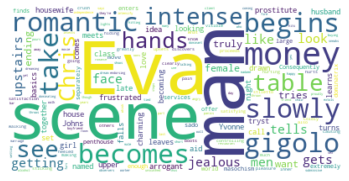

In [15]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the figure above we can see that Eva, man , scene, romantic, money, slowly etc are most frequenlty used so we can get some idea that this movie belongs to some drama wthout actually seeing the genre

In [30]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [17]:
#Applying Topic modeling using gensim library
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

In [18]:
import spacy

In [19]:
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [21]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [22]:
#Define more stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','a','about', 'above', 'across'])

In [23]:
    st1= ['after', 'afterwards','again','against', 'all', 'almost','alone','along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides',
           'between',
           'beyond',
           'bill',
           'both',
           'bottom',
           'but',
           'by',
           'call',
           'can',
           'cannot',
           'cant',
           'co',
           'con',
           'could',
           'couldnt',
           'cry',
           'de',
           'describe',
           'detail',
           'do',
           'done',
           'down',
           'due',
           'during',
           'each',
           'eg',
           'eight',
           'either',
           'eleven',
           'else',
           'elsewhere',
           'empty',
           'enough',
           'etc',
           'even',
           'ever',
           'every',
           'everyone',
           'everything',
           'everywhere',
           'except',
           'few',
           'fifteen',
           'fifty',
           'fill',
           'find',
           'fire',
           'first',
           'five',
           'for',
           'former',
           'formerly',
           'forty',
           'found',
           'four',
           'from',
           'front',
           'full',
           'further',
           'get',
           'give',
           'go',
           'had',
           'has',
           'hasnt',
           'have',
           'he',
           'hence',
           'her',
           'here',
           'hereafter',
           'hereby',
           'herein',
           'hereupon',
           'hers',
           'herself',
           'him',
           'himself',
           'his',
           'how',
           'however',
           'hundred',
           'i',
           'ie',
           'if',
           'in',
           'inc',
           'indeed',
           'interest',
           'into',
           'is',
           'it',
           'its',
           'itself',
           'keep',
           'last',
           'latter',
           'latterly',
           'least',
           'less',
           'ltd',
           'made',
           'many',
           'may',
           'me',
           'meanwhile',
           'might',
           'mill',
           'mine',
           'more',
           'moreover',
           'most',
           'mostly',
           'move',
           'much',
           'must',
           'my',
           'myself',
           'name',
           'namely',
           'neither',
           'never',
           'nevertheless',
           'next',
           'nine',
           'no',
           'nobody',
           'none',
           'noone',
           'nor',
           'not',
           'nothing',
           'now',
           'nowhere',
           'of',
           'off',
           'often',
           'on',
           'once',
           'one',
           'only',
           'onto',
           'or',
           'other',
           'others',
           'otherwise',
           'our',
           'ours',
           'ourselves',
           'out',
           'over',
           'own',
           'part',
           'per',
           'perhaps',
           'please',
           'put',
           'rather',
           're',
           'same',
           'see',
           'seem',
           'seemed',
           'seeming',
           'seems',
           'serious',
           'several',
           'she',
           'should',
           'show',
           'side',
           'since',
           'sincere',
           'six',
           'sixty',
           'so',
           'some',
           'somehow',
           'someone',
           'something',
           'sometime',
           'sometimes',
           'somewhere',
           'still',
           'such',
           'system',
           'take',
           'ten',
           'than',
           'that',
           'the',
           'their',
           'them',
           'themselves',
           'then',
           'thence',
           'there',
           'thereafter',
           'thereby',
           'therefore',
           'therein',
           'thereupon',
           'these',
           'they',
           'thick',
           'thin',
           'third',
           'this',
           'those',
           'though',
           'three',
           'through',
           'throughout',
           'thru',
           'thus',
           'to',
           'together',
           'too',
           'top',
           'toward',
           'towards',
           'twelve',
           'twenty',
           'two',
           'un',
           'under',
           'until',
           'up',
           'upon',
           'us',
           'very',
           'via',
           'was',
           'we',
           'well',
           'were',
           'what',
           'whatever',
           'when',
           'whence',
           'whenever',
           'where',
           'whereafter',
           'whereas',
           'whereby',
           'wherein',
           'whereupon',
           'wherever',
           'whether',
           'which',
           'while',
           'whither',
           'who',
           'whoever',
           'whole',
           'whom',
           'whose',
           'why',
           'will',
           'with',
           'within',
           'without',
           'would',
           'yet',
           'you',
           'your',
           'yours',
           'yourself',
           'yourselves']

In [24]:
stop_words.extend(st1)

In [25]:
#Applying coun vectorizer to get the count of words from plot summary of all the movies except for the stopwords which is ignored during theprocess
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words, max_df=.1, max_features=5000)
X = count.fit_transform(df['plot'].values)

In [26]:
print(X)

  (0, 3977)	1
  (0, 2955)	2
  (0, 3755)	1
  (0, 4938)	2
  (0, 4528)	1
  (0, 269)	1
  (0, 419)	1
  (0, 3976)	1
  (0, 2483)	1
  (0, 883)	1
  (0, 2563)	1
  (0, 1247)	2
  (0, 779)	1
  (0, 4794)	1
  (0, 3222)	20
  (0, 4892)	2
  (0, 4174)	3
  (0, 1609)	1
  (0, 4861)	1
  (0, 2138)	1
  (0, 4189)	1
  (0, 4423)	1
  (0, 3046)	1
  (0, 139)	1
  (0, 4065)	1
  :	:
  (42202, 4158)	1
  (42202, 656)	1
  (42202, 3062)	1
  (42202, 1238)	1
  (42202, 4887)	1
  (42202, 4849)	1
  (42202, 4924)	2
  (42202, 331)	1
  (42202, 1786)	1
  (42202, 3409)	1
  (42202, 50)	1
  (42202, 2942)	2
  (42202, 3724)	1
  (42202, 4456)	1
  (42202, 774)	1
  (42202, 1274)	1
  (42202, 2121)	1
  (42202, 2154)	2
  (42202, 4690)	1
  (42202, 2172)	1
  (42202, 1122)	1
  (42202, 4847)	1
  (42202, 168)	1
  (42202, 377)	1
  (42202, 1852)	2


In [27]:
#Applying LDA as part of Topic modeling forming 10 topics from the corpus
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10,random_state=123) #, learning_method=’online’)
X_topics = lda.fit_transform(X)

In [28]:
lda.components_.shape

(10, 5000)

In [29]:
#Printing the top 5 wordsfrom each topic
n_top_words = 5
feature_names = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([feature_names[i]
    for i in topic.argsort()                 [:-n_top_words - 1:-1]]))

Topic 1:
joe team game alex ben
Topic 2:
tom jerry dog bugs cat
Topic 3:
john king prince eddie show
Topic 4:
max prison gang tony kills
Topic 5:
mary mike nick bank ray
Topic 6:
david harry michael sam jimmy
Topic 7:
jack parents marriage marry baby
Topic 8:
war village american women many
Topic 9:
dr charlie peter body frank
Topic 10:
ship war army captain attack


Ref: https://www.kaggle.com/akashram/topic-modeling-intro-implementation

Ref : https://towardsdatascience.com/unsupervised-sentiment-analysis-a38bf1906483

Ref : https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

Challenge:
I am not able to proceed further on how to match these topics with thegenres and use them to recommend movies for any user